### Install AutoViz

In [1]:
!pip install autoviz

In [2]:
!pip install matplotlib

### Import libraries

In [3]:
import matplotlib.pyplot as plt
import seaborn           as sns
import pandas            as pd  # Processamento dos dados
import numpy             as np  # Algebra Linear
import math

from autoviz.AutoViz_Class   import AutoViz_Class

%matplotlib inline

# sns.set_style('darkgrid')

Output hidden; open in https://colab.research.google.com to view.

### Importing dataset

In [4]:
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1tcRUoQ1CyBFX5ydViH1gv3LgZ-vU2rkH' -O 'breastCancer.csv'

--2022-01-12 16:11:10--  https://drive.google.com/uc?export=download&id=1tcRUoQ1CyBFX5ydViH1gv3LgZ-vU2rkH
Resolving drive.google.com (drive.google.com)... 108.177.13.102, 108.177.13.100, 108.177.13.139, ...
Connecting to drive.google.com (drive.google.com)|108.177.13.102|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-08-b0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/9nq5tm7ukld1tcvfs7f87llp487dqiv6/1642003800000/15923104539900135253/*/1tcRUoQ1CyBFX5ydViH1gv3LgZ-vU2rkH?e=download [following]
--2022-01-12 16:11:10--  https://doc-08-b0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/9nq5tm7ukld1tcvfs7f87llp487dqiv6/1642003800000/15923104539900135253/*/1tcRUoQ1CyBFX5ydViH1gv3LgZ-vU2rkH?e=download
Resolving doc-08-b0-docs.googleusercontent.com (doc-08-b0-docs.googleusercontent.com)... 108.177.13.132, 2607:f8b0:400c:c09::84
Connecting to doc-08-b0-docs.googleusercontent.com (doc-08

In [5]:
df = pd.read_csv('/content/breastCancer.csv')

In [6]:
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [7]:
# Droping id and unamed columns
df.drop('id', axis = 1, inplace = True)
df.drop(df.filter(regex="Unnamed"),axis=1, inplace=True)

In [8]:
df.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Let's keep only the mean variables

In [9]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [10]:
df = df[['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']]

In [11]:
df.diagnosis = df.diagnosis.map({'M': 0, 'B': 1})

In [12]:
df.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


### Analysing dataset

<AxesSubplot:>

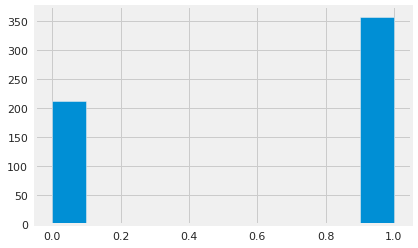

In [13]:
df.diagnosis.hist()

<AxesSubplot:title={'center':'Diagnosis'}, ylabel='diagnosis'>

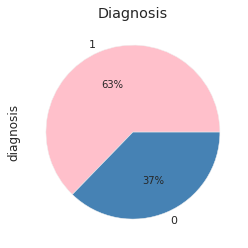

In [14]:
diagnosis_count = df.diagnosis.value_counts()
diagnosis_count.plot(kind="pie", y='points', autopct='%1.0f%%',
                          colors = ['pink', 'steelblue'],
                          title='Diagnosis')

<AxesSubplot:>

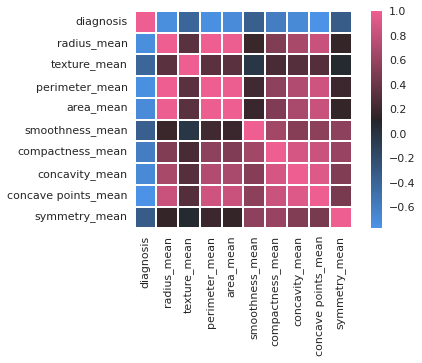

In [15]:
corr = df.iloc[:,:-1].corr()
cmap = sns.diverging_palette(250,354,80,60,center='dark', as_cmap=True)
sns.heatmap(corr, cmap=cmap, square=True, linewidths=.2)

As we can see, radius_mean, perimeter_mean and area_mean are very correlated. Therefore, we're going to wipe perimeter_mean and area_mean columns.

The same thought can be used to analyze compactness_mean, concavity_mean and cocave_points_mean.

In [16]:
df = df[['diagnosis', 'radius_mean', 'texture_mean','smoothness_mean', 'compactness_mean','symmetry_mean', 'fractal_dimension_mean']]

<AxesSubplot:>

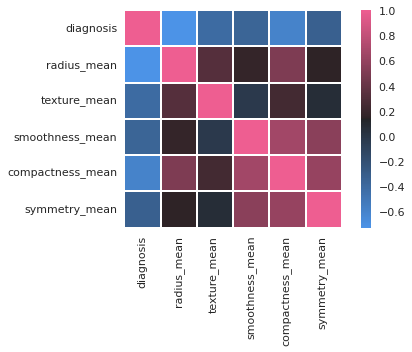

In [17]:
corr = df.iloc[:,:-1].corr()
cmap = sns.diverging_palette(250,354,80,60,center='dark', as_cmap=True)
sns.heatmap(corr, cmap=cmap, square=True, linewidths=.2)

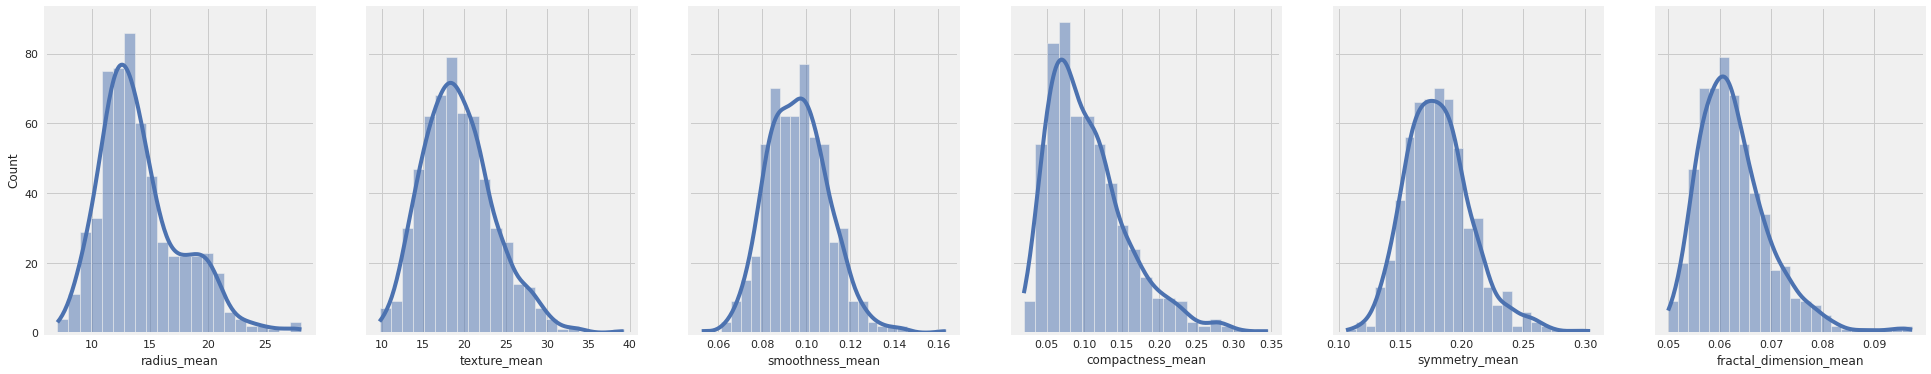

In [18]:
fig, axes = plt.subplots(1, len(df.columns)-1, figsize=(30,6), sharey=True)
for col in range(1,len(df.columns)):
  sns.histplot(df, ax=axes[col-1], x=df.columns[col], kde=True)

## Naive Bayes

$P(Y|x) = \frac{ P(X=  x_{0},x_{1},x_{2} | Y=y   ) \cdot P(Y=y)   }{   P(x)   }$

$posterior = \frac{likelihood \cdot prior}{evidence}$

### Calculate P(Y=y) for all possible y

In [19]:
def calculatePrior(data, Y):
  classes = sorted(list(data[Y].unique()))
  prior = []
  for i in classes:
    mean = len(data[data[Y] == i])/len(data)
    prior.append(mean)
  return prior

In [20]:
def calculateLikelihoodGaussian(data, inputName, inputValue, Y, label):
  data = data[data[Y] == label]
  mean, std = data[inputName].mean(), data[inputName].std()
  return (1/ (np.sqrt(2 * np.pi) * std)) * np.exp(-((inputValue-mean)**2 / (2*std**2 )))

In [21]:
def naive_bayes_gaussian(df, X, Y):
    inputs = list(df.columns)
    inputs.remove(Y)

    prior = calculatePrior(df, Y)

    Y_pred = []
    for x in X:
        labels = sorted(list(df[Y].unique()))
        likelihood = [1]*len(labels)
        for j in range(len(labels)):
            for i in range(len(inputs)):
                likelihood[j] *= calculateLikelihoodGaussian(df, inputs[i], x[i], Y, labels[j])

        post_prob = [1]*len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]

        Y_pred.append(np.argmax(post_prob))

    return np.array(Y_pred) 

In [22]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=.2, random_state=41)

X_test = test.drop(['diagnosis'], axis=1).values
Y_test = test['diagnosis'].values

Y_pred = naive_bayes_gaussian(train, X=X_test, Y="diagnosis")

from sklearn.metrics import confusion_matrix, f1_score
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred).ravel()

print('True Negative: ', tn)
print('False Positive: ', fp)
print('False Negative: ', fn)
print('True Positive ', tp)
print('\n')
print(f1_score(Y_test, Y_pred))

True Negative:  36
False Positive:  4
False Negative:  4
True Positive  70


0.9459459459459459
